In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car dekho.csv")

In [3]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
##check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_dataset = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset['Current_year']=2020

In [11]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020


In [12]:
final_dataset['No_year']=final_dataset['Current_year']-final_dataset['Year']

In [13]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3


In [14]:
#droping columns
final_dataset.drop(['Year','Current_year'],axis=1,inplace=True)

In [15]:
final_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [16]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

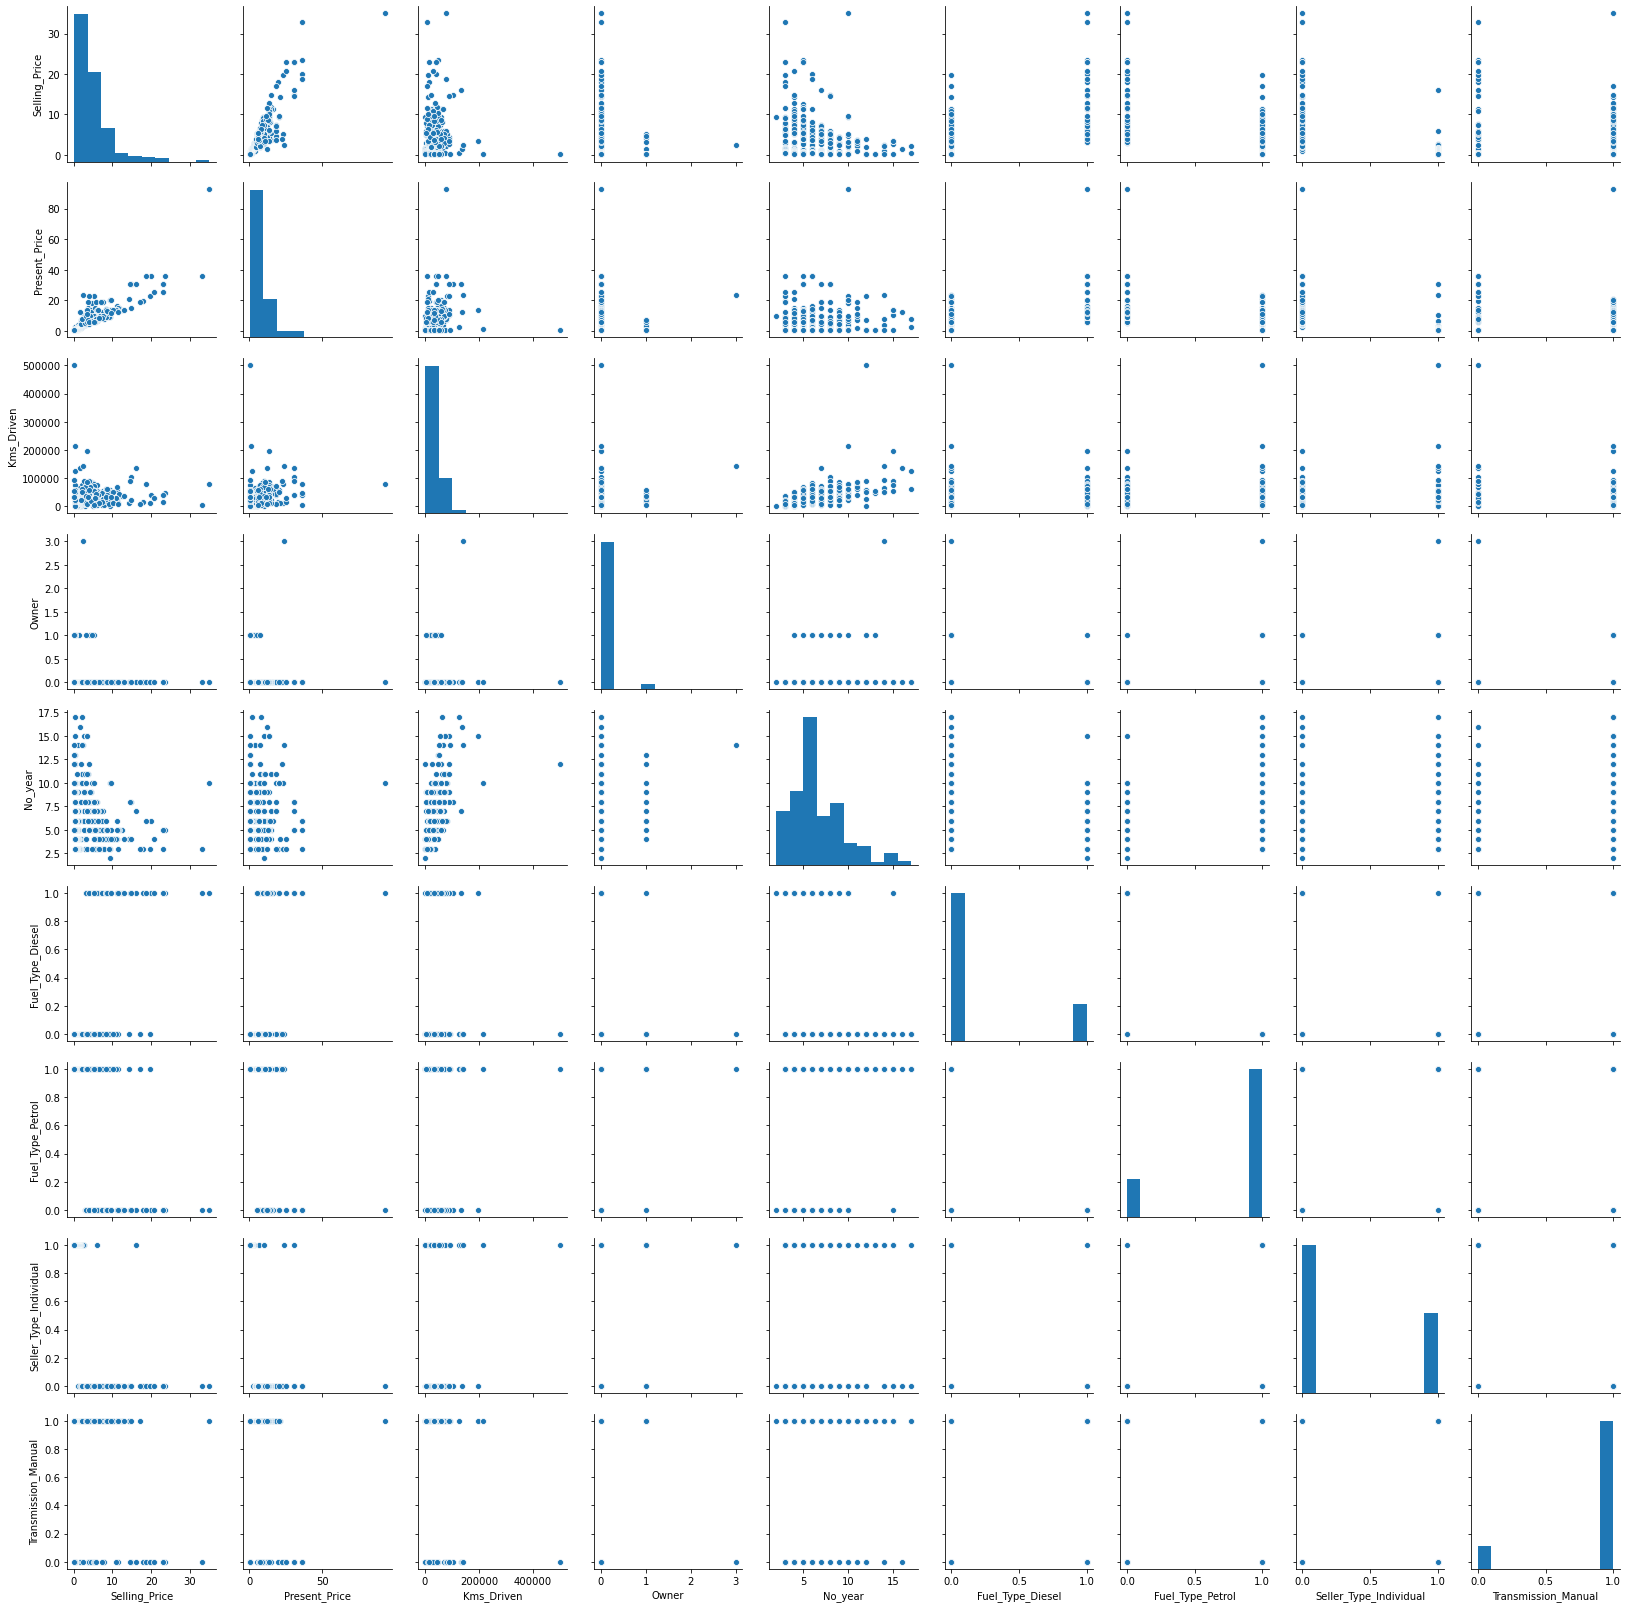

In [20]:
sns.pairplot(final_dataset)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

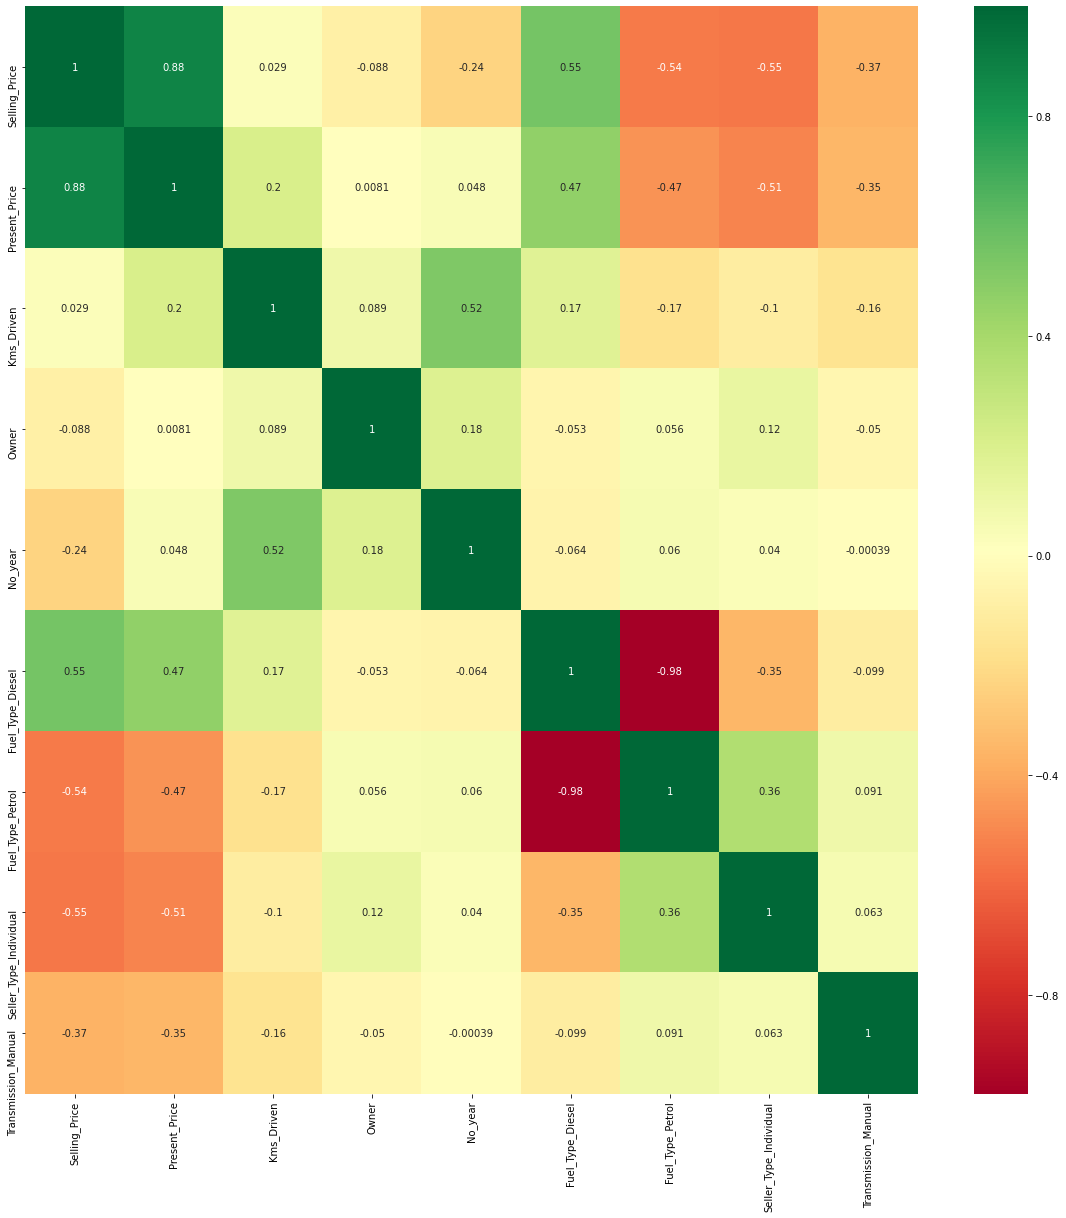

In [22]:
corrmat = final_dataset.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [24]:
#D.V and I.V.
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [25]:
X.head(3)

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1


In [26]:
#features importance
#try to solve the feature importance using OLS stats
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [27]:
print(model.feature_importances_)

[3.29496604e-01 3.78476416e-02 4.76584483e-04 6.61817206e-02
 2.82050742e-01 1.12213090e-04 1.28226714e-01 1.55607780e-01]


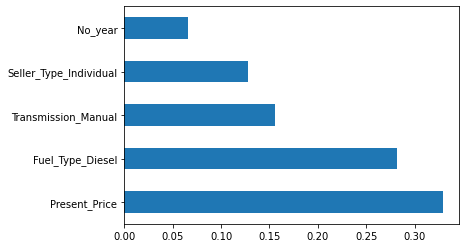

In [28]:
#plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
x_train.shape

(240, 8)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [32]:
import numpy as np
##Hyper parameters
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12)]

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
#Randomized search CV

#Number of tress in random forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
#max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [35]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune

rf = RandomForestRegressor()

In [37]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [38]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [39]:
predictions = rf_random.predict(x_test)

In [40]:
predictions

array([ 2.76021487,  0.52354592,  5.52574752,  0.22791505,  0.43291421,
        3.4660596 , 20.87117228,  0.52395299,  1.16356121,  0.61855636,
        4.57623065,  4.90020221,  0.40275036,  7.86061871,  6.03840114,
       10.39336152,  0.62702575,  4.23377092,  4.59546022, 17.95349497,
        4.73942369,  0.23479251,  0.68702033,  2.8729935 , 13.99648575,
       20.71887331,  5.83658764,  1.1585664 ,  0.25669161,  7.11993315,
        0.6044178 ,  2.722063  ,  5.52595862, 10.0902499 ,  5.8909508 ,
        7.20849944,  4.71656156,  0.37107945,  2.89429339, 10.52998927,
        0.45843984,  6.84948755,  2.04004873, 10.09979511,  0.32686819,
        4.83418144,  0.38764168,  3.4210851 ,  1.09056405,  7.09699978,
        1.07676569,  0.54527658,  4.11323799,  5.60686244,  7.35282022,
        4.40163728,  6.54593941,  9.94230102,  0.44554347,  5.3037453 ,
        5.11378522])

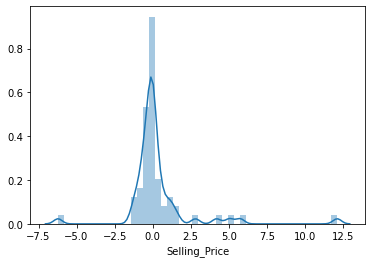

In [41]:
sns.distplot(y_test-predictions)

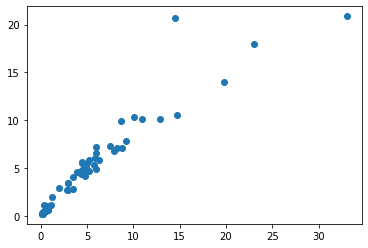

In [42]:
plt.scatter(y_test, predictions)

In [43]:
import pickle
#open a file where you want to store the data
file = open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)